
# 📊 Customer Churn Prediction - Complete ML Project

## Objective
Predict whether a telecom customer will churn using Machine Learning models.

This notebook includes:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Handling Class Imbalance (SMOTE)
- Logistic Regression
- Random Forest
- XGBoost
- Model Comparison
- Feature Importance
- Model Saving for Streamlit Deployment


In [1]:
# Import Libraries
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import pickle
import warnings
warnings.filterwarnings("ignore")


ImportError: cannot import name '_safe_tags' from 'sklearn.utils._tags' (C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py)

In [ ]:
# Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Data Cleaning
df.drop("customerID", axis=1, inplace=True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Exploratory Data Analysis (EDA)

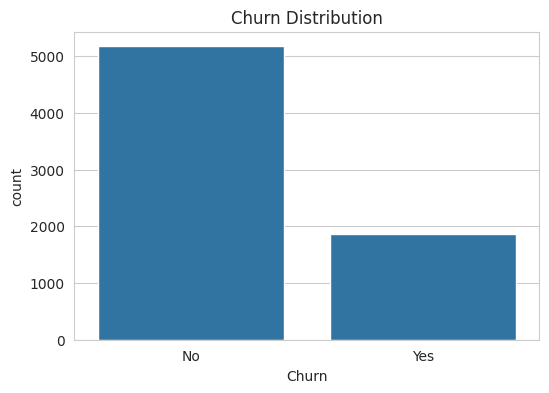

,proportion
Churn,
No,0.73463
Yes,0.26537


In [ ]:
# Churn Distribution

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

df["Churn"].value_counts(normalize=True)


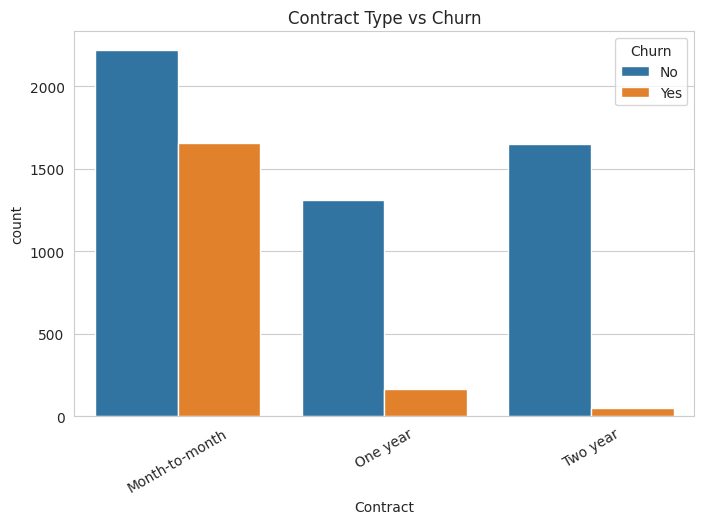

In [ ]:
# Contract vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.xticks(rotation=30)
plt.title("Contract Type vs Churn")
plt.show()


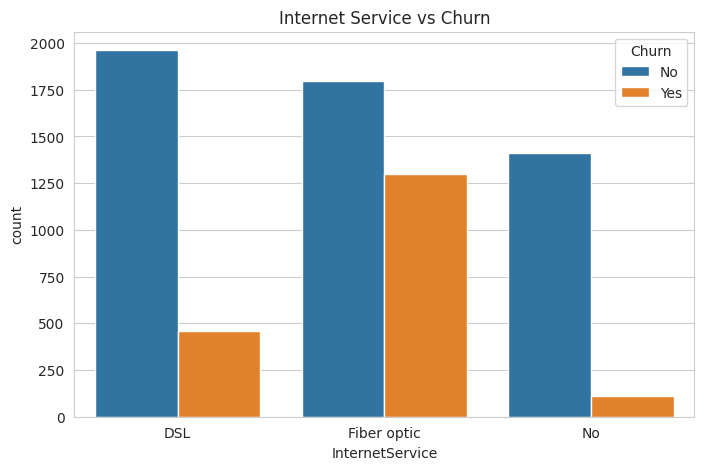

In [ ]:
# Internet Service vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()


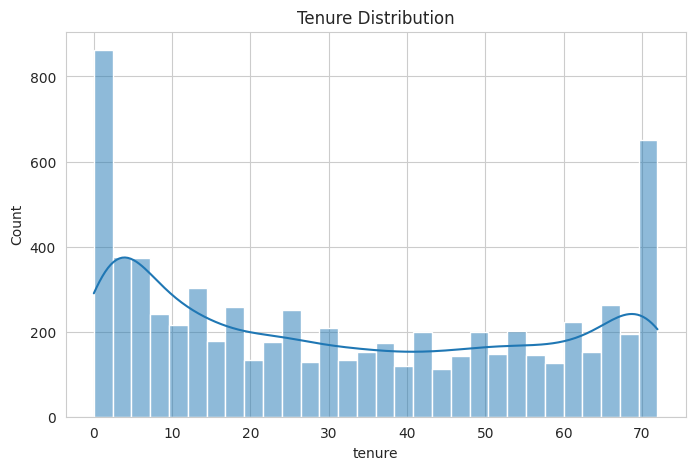

In [ ]:
# Tenure Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


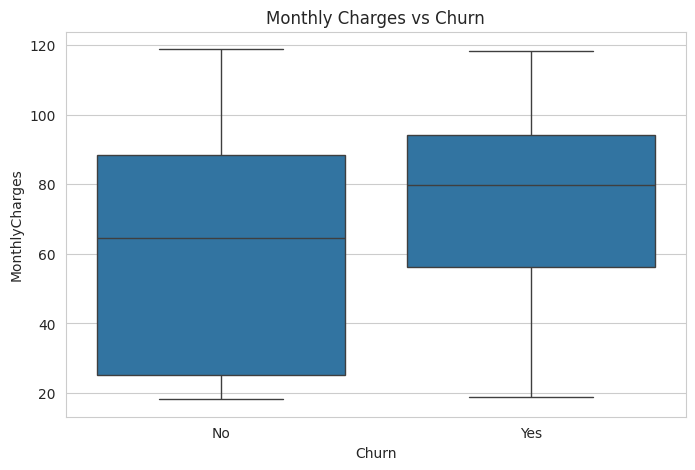

In [ ]:
# Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


 # Prepare Data

In [ ]:
# Separate Features & Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

y = y.map({"No": 0, "Yes": 1})

#One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Handle Class Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

pd.Series(y_train).value_counts()


,count
Churn,
0,4138
1,4138


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train Models

In [ ]:
# LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]


In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


In [ ]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]


In [ ]:
# Model Comparison
models = {
    "Logistic Regression": (y_pred_lr, y_prob_lr),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb)
}

for name, (pred, prob) in models.items():
    print("\n", name)
    print("Accuracy:", accuracy_score(y_test, pred))
    print("ROC-AUC:", roc_auc_score(y_test, prob))



 Logistic Regression
Accuracy: 0.7977288857345636
ROC-AUC: 0.8436953326363513

 Random Forest
Accuracy: 0.7906316536550745
ROC-AUC: 0.8561827817859988

 XGBoost
Accuracy: 0.7920511000709723
ROC-AUC: 0.8355618640471187


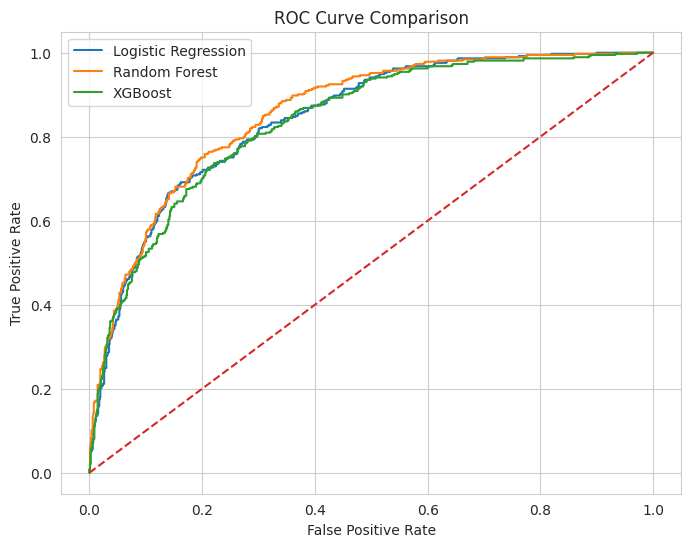

In [ ]:
# ROC Curve Comparison
plt.figure(figsize=(8,6))

for name, (pred, prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


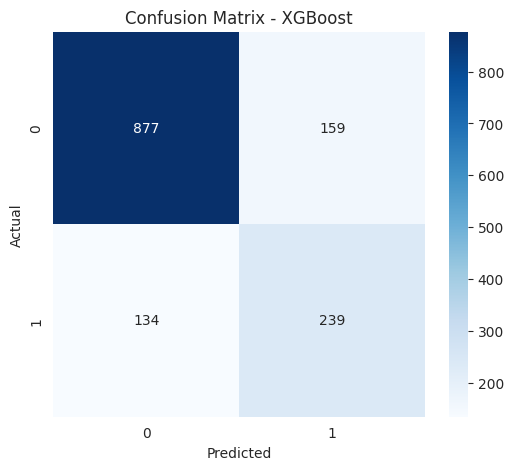

In [ ]:
# Confusion Matrix (Best Model)
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


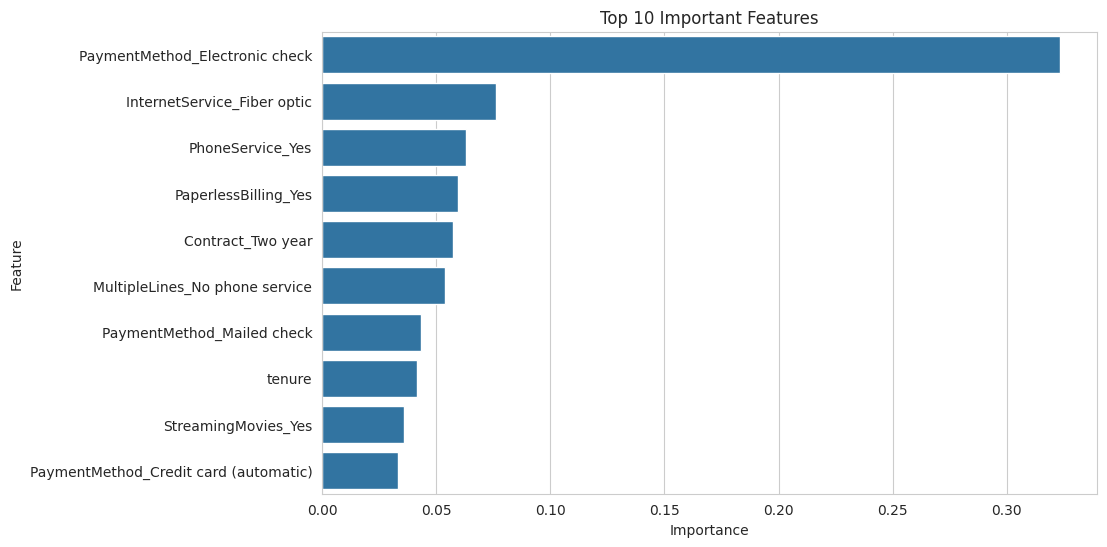

In [ ]:
# Feature Importance (XGBoost)
importances = xgb.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
# Feature Importance (XGBoost)
pickle.dump(xgb, open("churn_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(X.columns, open("features.pkl", "wb"))
